# Business Problem Optimization Using Linear Programming
### Internship Task – 4 (CODTECH)

This project demonstrates how a real-world business problem can be solved
using **Optimization Techniques**, specifically **Linear Programming (LP)**.
The solution is implemented using the **PuLP** library in Python.

Objective:
- To maximize business profit under limited resources.


## Business Problem Statement

A manufacturing company produces two products:
- **Product A**
- **Product B**

Each product requires a certain amount of machine hours and labor hours.
The company has limited resources and wants to determine the optimal number
of units to produce for each product in order to **maximize total profit**.


## Given Data

| Resource        | Product A | Product B | Available |
|----------------|----------|----------|-----------|
| Machine Hours  | 2        | 1        | 100       |
| Labor Hours    | 1        | 1        | 80        |
| Profit (₹)     | 40       | 30       | -         |


## Mathematical Model

### Decision Variables:
- x = Number of units of Product A
- y = Number of units of Product B

### Objective Function:
Maximize Profit  
Z = 40x + 30y

### Constraints:
- 2x + y ≤ 100   (Machine Hours Constraint)
- x + y ≤ 80     (Labor Hours Constraint)
- x ≥ 0, y ≥ 0   (Non-negativity Constraints)


In [1]:
# Install PuLP if not already installed
# Uncomment the line below if PuLP is not installed
# !pip install pulp

from pulp import *


In [2]:
# Create a Linear Programming Maximization problem
model = LpProblem("Manufacturing_Profit_Maximization", LpMaximize)


In [3]:
# Decision Variables
x = LpVariable('Product_A', lowBound=0)
y = LpVariable('Product_B', lowBound=0)


In [4]:
# Objective Function: Maximize Profit
model += 40 * x + 30 * y, "Maximize_Total_Profit"


In [5]:
# Constraints
model += 2 * x + y <= 100, "Machine_Hours_Constraint"
model += x + y <= 80, "Labor_Hours_Constraint"


In [6]:
# Solve the optimization problem
model.solve()


1

In [7]:
# Display solution status
print("Status:", LpStatus[model.status])

# Optimal values of decision variables
print("Optimal units of Product A:", x.varValue)
print("Optimal units of Product B:", y.varValue)

# Maximum profit
print("Maximum Profit: ₹", value(model.objective))


Status: Optimal
Optimal units of Product A: 20.0
Optimal units of Product B: 60.0
Maximum Profit: ₹ 2600.0


## Results Interpretation

- The optimal production quantity for **Product A** is 20 units.
- The optimal production quantity for **Product B** is 60 units.
- The maximum achievable profit is **₹2600**.

This solution ensures that all constraints are satisfied while maximizing profit.


## Business Insights

- Product B is more resource-efficient in terms of machine hours.
- Labor hours are fully utilized, making it a critical constraint.
- Linear Programming helps businesses make optimal decisions without trial and error.
- PuLP provides an efficient way to implement optimization models in Python.


## Conclusion

This project demonstrates the use of **Linear Programming** to solve a business
optimization problem. By using **PuLP in Python**, we successfully modeled
constraints, solved the optimization problem, and derived meaningful insights.

Such optimization techniques are widely used in manufacturing, logistics,
finance, and supply chain management.


## Tools & Technologies Used

- Python
- PuLP (Linear Programming Library)
- Jupyter Notebook
- Optimization Techniques


# Supply Chain Optimization Problem

A company operates **two warehouses** that supply products to **three retail stores**.
Each warehouse has a limited supply capacity, and each store has a specific demand.
The cost of transporting one unit from a warehouse to a store is known.

Objective:
- **Minimize total transportation cost**
- While meeting all store demands without exceeding warehouse capacities


## Supply Chain Data

### Warehouse Supply Capacity
- Warehouse 1: 100 units
- Warehouse 2: 150 units

### Store Demand
- Store A: 80 units
- Store B: 120 units
- Store C: 50 units

### Transportation Cost per Unit (₹)

| From / To | Store A | Store B | Store C |
|----------|--------|--------|--------|
| Warehouse 1 | 4 | 6 | 8 |
| Warehouse 2 | 5 | 4 | 3 |


## Mathematical Model

### Decision Variables:
Let x_ij = units transported from warehouse i to store j

### Objective Function:
Minimize Total Cost =
4x₁ₐ + 6x₁ᵦ + 8x₁𝑐 + 5x₂ₐ + 4x₂ᵦ + 3x₂𝑐

### Constraints:

Supply Constraints:
- x₁ₐ + x₁ᵦ + x₁𝑐 ≤ 100
- x₂ₐ + x₂ᵦ + x₂𝑐 ≤ 150

Demand Constraints:
- x₁ₐ + x₂ₐ = 80
- x₁ᵦ + x₂ᵦ = 120
- x₁𝑐 + x₂𝑐 = 50

Non-negativity:
- All x_ij ≥ 0


In [8]:
# Create a minimization problem
supply_chain_model = LpProblem("Supply_Chain_Cost_Minimization", LpMinimize)


In [9]:
# Decision variables
x1A = LpVariable('W1_to_A', lowBound=0)
x1B = LpVariable('W1_to_B', lowBound=0)
x1C = LpVariable('W1_to_C', lowBound=0)

x2A = LpVariable('W2_to_A', lowBound=0)
x2B = LpVariable('W2_to_B', lowBound=0)
x2C = LpVariable('W2_to_C', lowBound=0)


In [10]:
# Objective Function: Minimize Transportation Cost
supply_chain_model += (
    4 * x1A + 6 * x1B + 8 * x1C +
    5 * x2A + 4 * x2B + 3 * x2C
), "Minimize_Transportation_Cost"


In [11]:
# Supply constraints
supply_chain_model += x1A + x1B + x1C <= 100, "Warehouse_1_Supply"
supply_chain_model += x2A + x2B + x2C <= 150, "Warehouse_2_Supply"


In [12]:
# Demand constraints
supply_chain_model += x1A + x2A == 80, "Store_A_Demand"
supply_chain_model += x1B + x2B == 120, "Store_B_Demand"
supply_chain_model += x1C + x2C == 50, "Store_C_Demand"


In [13]:
# Solve the model
supply_chain_model.solve()


1

In [18]:
# Solution status
print("Status:", LpStatus[supply_chain_model.status])

# Optimal shipment quantities
print("Warehouse 1 → Store A:", x1A.varValue)
print("Warehouse 1 → Store B:", x1B.varValue)
print("Warehouse 1 → Store C:", x1C.varValue)

print("Warehouse 2 → Store A:", x2A.varValue)
print("Warehouse 2 → Store B:", x2B.varValue)
print("Warehouse 2 → Store C:", x2C.varValue)

# Minimum transportation cost
print("Minimum Transportation Cost: ₹", value(supply_chain_model.objective))


Status: Optimal
Warehouse 1 → Store A: 80.0
Warehouse 1 → Store B: 20.0
Warehouse 1 → Store C: 0.0
Warehouse 2 → Store A: 0.0
Warehouse 2 → Store B: 100.0
Warehouse 2 → Store C: 50.0
Minimum Transportation Cost: ₹ 990.0


In [16]:
import matplotlib.pyplot as plt

# Warehouses and stores
warehouses = ['Warehouse 1', 'Warehouse 2']
stores = ['Store A', 'Store B', 'Store C']

# Shipment quantities from solution
shipments = {
    ('Warehouse 1', 'Store A'): x1A.varValue,
    ('Warehouse 1', 'Store B'): x1B.varValue,
    ('Warehouse 1', 'Store C'): x1C.varValue,
    ('Warehouse 2', 'Store A'): x2A.varValue,
    ('Warehouse 2', 'Store B'): x2B.varValue,
    ('Warehouse 2', 'Store C'): x2C.varValue,
}


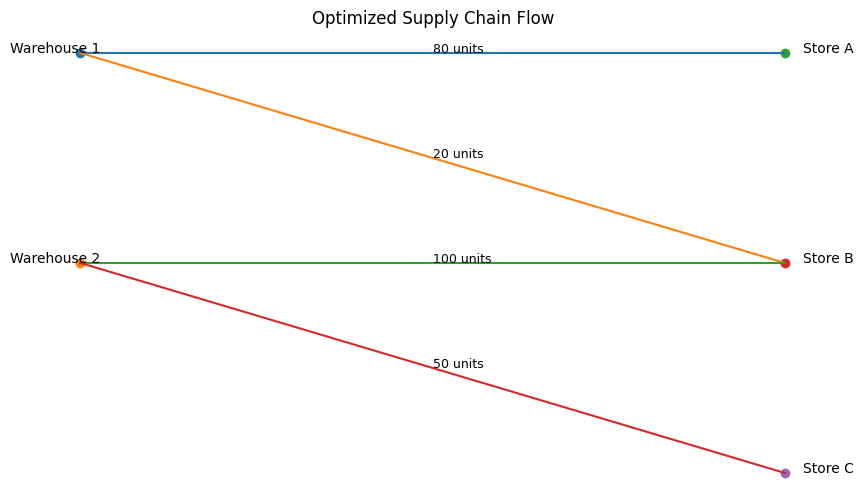

In [17]:
plt.figure(figsize=(10, 6))

# X-axis positions
warehouse_positions = [0, 0]
store_positions = [2, 2, 2]

warehouse_y = [2, 1]
store_y = [2, 1, 0]

# Plot warehouses
for i, w in enumerate(warehouses):
    plt.scatter(0, warehouse_y[i])
    plt.text(-0.2, warehouse_y[i], w, fontsize=10)

# Plot stores
for i, s in enumerate(stores):
    plt.scatter(2, store_y[i])
    plt.text(2.05, store_y[i], s, fontsize=10)

# Draw shipment lines
for (w, s), qty in shipments.items():
    if qty > 0:
        w_index = warehouses.index(w)
        s_index = stores.index(s)
        plt.plot([0, 2], [warehouse_y[w_index], store_y[s_index]])
        plt.text(1, (warehouse_y[w_index] + store_y[s_index]) / 2,
                 f'{int(qty)} units', fontsize=9)

plt.title("Optimized Supply Chain Flow")
plt.axis('off')
plt.show()


## Supply Chain Visualization Explanation

- Warehouses are shown on the left, and stores are shown on the right.
- Lines represent shipment routes selected by the optimization model.
- Shipment quantities are labeled on each route.
- Only optimal routes with positive shipment quantities are displayed.

This visualization helps decision-makers quickly understand how goods are
distributed across the supply chain.


In [ ]:
## Business Insights from Supply Chain Optimization

- Optimization helps reduce logistics and transportation costs.
- Efficient warehouse-to-store allocation improves supply chain performance.
- Linear Programming is widely used in real-world supply chain and logistics planning.
- PuLP makes complex optimization problems easy to implement in Python.


## Supply Chain Results Interpretation

- The model allocates shipments in a way that satisfies all store demands.
- Cheaper transportation routes are preferred automatically.
- Warehouse capacities are respected.
- The total transportation cost is minimized efficiently.


## Final Conclusion

This notebook demonstrates two major applications of optimization techniques:
1. **Profit Maximization in Manufacturing**
2. **Cost Minimization in Supply Chain Management**

Using Linear Programming and the PuLP library, we solved real-world business
problems efficiently and derived actionable insights, making this project
highly relevant for data science and analytics roles.
